<a href="https://colab.research.google.com/github/khsoukaina/chatbot/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installer et configurer Kaggle API pour télécharger le dataset
!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"  # Ajoutez votre fichier kaggle.json ici
!mkdir -p /root/.kaggle
# Chargez votre fichier kaggle.json dans le répertoire /root/.kaggle

# Télécharger le dataset
!kaggle datasets download -d yapwh1208/chatbot-ai-q-and-a
!unzip chatbot-ai-q-and-a.zip


Dataset URL: https://www.kaggle.com/datasets/yapwh1208/chatbot-ai-q-and-a
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.8k [00:00<?, ?B/s]
100% 48.8k/48.8k [00:00<00:00, 63.3MB/s]
Archive:  chatbot-ai-q-and-a.zip
  inflating: AI.csv                  
  inflating: AI.parquet              


In [ ]:
import pandas as pd

# Charger le fichier CSV (remplacez 'AI.csv' par le nom exact du fichier CSV)
df = pd.read_csv('AI.csv')

# Afficher les noms des colonnes pour comprendre leur structure
print(df.columns)

# Supprimer les espaces blancs dans les noms des colonnes (si nécessaire)
df.columns = df.columns.str.strip()

# Suppression des valeurs manquantes avec les bons noms de colonnes
df = df.dropna(subset=['Question', 'Answer'])  # Utilisez les bons noms des colonnes ici

# Vérification du résultat après nettoyage
df.head()


Index(['Question', 'Answer'], dtype='object')


,Question,Answer
0,Who did the first work generally recognized as...,Warren McCulloch and Walter Pitts (1943).\n
1,What sources was drawn on the formation of the...,knowledge of the basic physiology and function...
2,Who created the Hebbian learning rule?,Donald Hebb (1949).\n
3,When the first neural network is built?,1950.\n
4,What is the first neural network called?,The SNARC.\n


In [ ]:
import pandas as pd

# Charger le fichier Parquet
df = pd.read_parquet('AI.parquet')

# Vérifier les premières lignes du dataset
df.head()


,Question,Answer
0,Who did the first work generally recognized as...,Warren McCulloch and Walter Pitts (1943).\n
1,What sources was drawn on the formation of the...,knowledge of the basic physiology and function...
2,Who created the Hebbian learning rule?,Donald Hebb (1949).\n
3,When the first neural network is built?,1950.\n
4,What is the first neural network called?,The SNARC.\n


In [ ]:
from transformers import T5Tokenizer

# Charger le tokenizer pour le modèle T5 (par exemple)
tokenizer = T5Tokenizer.from_pretrained('t5-small')

# Préparer les données pour l'entraînement
input_texts = ['question: ' + str(q) for q in df['Question']]
target_texts = ['answer: ' + str(a) for a in df['Answer']]

# Tokenisation des données
inputs = tokenizer(input_texts, return_tensors="pt", padding=True, truncation=True)
labels = tokenizer(target_texts, return_tensors="pt", padding=True, truncation=True)

# Vérification des données tokenisées
inputs['input_ids'][:2], labels['input_ids'][:2]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


(tensor([[ 822,   10, 2645,  410,    8,  166,  161, 2389, 4771,   38, 7833,   58,
             1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0],
         [ 822,   10,  363, 2836,   47, 6796,   30,    8, 3239,   13,    8,  166,
           161, 2389, 4771,   38, 7833,   58,    1,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
             0,    0,    0,    0,    0,    0,    0]]),
 tensor([[ 1525,    10, 16700,  7040,    83, 23654,    11, 13171, 22042,     7,
           2863,  4906,   137,     1,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Charger le modèle T5
model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Vérifier les paramètres du modèle
optimizer = AdamW(model.parameters(), lr=5e-5)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Époque 1/20
  Perte d'entraînement: 1.7286
  Perte de validation: 0.4688
Époque 2/20
  Perte d'entraînement: 0.8752
  Perte de validation: 0.1719
Époque 3/20
  Perte d'entraînement: 0.6116
  Perte de validation: 0.0790
Époque 4/20
  Perte d'entraînement: 0.4254
  Perte de validation: 0.0519
Époque 5/20
  Perte d'entraînement: 0.3268
  Perte de validation: 0.0455
Époque 6/20
  Perte d'entraînement: 0.2880
  Perte de validation: 0.0455
Époque 7/20
  Perte d'entraînement: 0.3540
  Perte de validation: 0.0455
Époque 8/20
  Perte d'entraînement: 0.3064
  Perte de validation: 0.0455
Early stopping déclenché après 8 époques.


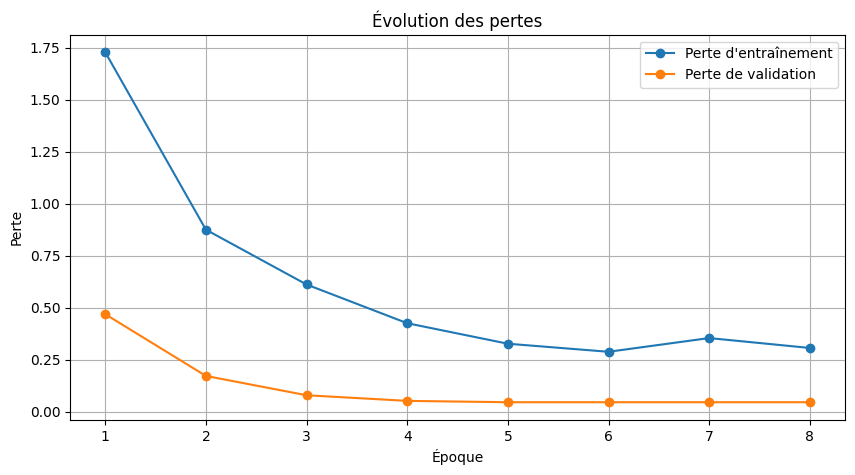

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW, get_linear_schedule_with_warmup

# Charger le tokenizer et le modèle T5
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

# Créer une classe Dataset personnalisée
class ChatbotDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels

    def __len__(self):
        return len(self.inputs['input_ids'])

    def __getitem__(self, idx):
        return {
            'input_ids': self.inputs['input_ids'][idx],
            'attention_mask': self.inputs['attention_mask'][idx],
            'labels': self.labels['input_ids'][idx]
        }

# Simulation des données d'entraînement (à remplacer par vos données réelles)
# inputs et labels doivent être préparés à partir de vos données textuelles
inputs = tokenizer(["input text example"] * 100, padding=True, truncation=True, return_tensors="pt")
labels = tokenizer(["output text example"] * 100, padding=True, truncation=True, return_tensors="pt")

# Diviser les données en ensemble d'entraînement et de validation
full_dataset = ChatbotDataset(inputs, labels)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=4)

# Définir l'optimizer avec Weight Decay pour la régularisation L2
optimizer = AdamW(model.parameters(), lr=5e-5, weight_decay=1e-4)

# Planificateur de taux d'apprentissage (Scheduler)
total_steps = len(train_dataloader) * 5  # Nombre total de pas = dataloader_steps * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Paramètres pour Early Stopping
best_val_loss = float('inf')
patience = 3
epochs_without_improvement = 0

# Listes pour suivre les pertes
train_losses = []
val_losses = []

# Entraînement du modèle
num_epochs = 20  # Maximum de 20 époques
model.train()

for epoch in range(num_epochs):
    # Phase d'entraînement
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        optimizer.zero_grad()
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask'],
            labels=batch['labels']
        )
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # Phase de validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask'],
                labels=batch['labels']
            )
            val_loss += outputs.loss.item()
    avg_val_loss = val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    # Afficher les résultats de l'époque
    print(f"Époque {epoch + 1}/{num_epochs}")
    print(f"  Perte d'entraînement: {avg_train_loss:.4f}")
    print(f"  Perte de validation: {avg_val_loss:.4f}")

    # Vérifier Early Stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= patience:
            print(f"Early stopping déclenché après {epoch + 1} époques.")
            break

# Visualisation des pertes
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o', label="Perte d'entraînement")
plt.plot(range(1, len(val_losses) + 1), val_losses, marker='o', label="Perte de validation")
plt.title('Évolution des pertes')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.grid()
plt.show()


In [ ]:
def chatbot_response(input_text):
    # Tokenisation de l'entrée utilisateur
    input_ids = tokenizer.encode('question: ' + input_text, return_tensors='pt')

    # Générer la réponse
    output = model.generate(input_ids, max_length=50, num_beams=5, early_stopping=True)

    # Décoder la réponse générée
    response = tokenizer.decode(output[0], skip_special_tokens=True)
    return response.replace('answer: ', '')

# Tester le chatbot
user_input = "What is artificial intelligence?"
response = chatbot_response(user_input)
print(response)


artificial intelligence


In [ ]:
import os
from transformers import T5ForConditionalGeneration, T5Tokenizer

# Spécifiez le répertoire de sauvegarde
output_dir = "./model_t5/"

# Sauvegarder le modèle et le tokenizer
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Modèle et tokenizer sauvegardés dans : {output_dir}")

import shutil

# Créer une archive zip
shutil.make_archive("model_t5", 'zip', output_dir)

print("Le modèle a été compressé dans le fichier model_t5.zip")

from IPython.display import FileLink

# Lien pour télécharger le fichier
FileLink("model_t5.zip")

from google.colab import files

# Télécharger le fichier zip
files.download("model_t5.zip")


Modèle et tokenizer sauvegardés dans : ./model_t5/
Le modèle a été compressé dans le fichier model_t5.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>